In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats
%matplotlib notebook

In [2]:
data = np.loadtxt("./Geographical Original of Music/default_plus_chromatic_features_1059_tracks.txt",delimiter=",",skiprows=0)
num_row,num_feature = data.shape[0],data.shape[1]-2
x = data[:,:num_feature]
y = data[:,num_feature:]
latitude = y[:,0]
longitude = y[:,1]

In [3]:
latitude += abs(min(latitude)) + 1
longitude += abs(min(longitude)) + 1

In [4]:
latitude = stats.boxcox(latitude)[0]
longitude = stats.boxcox(longitude)[0]

In [5]:
# Create linear regression object
regr = linear_model.LinearRegression()


0.311309961306


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


<IPython.core.display.Javascript object>


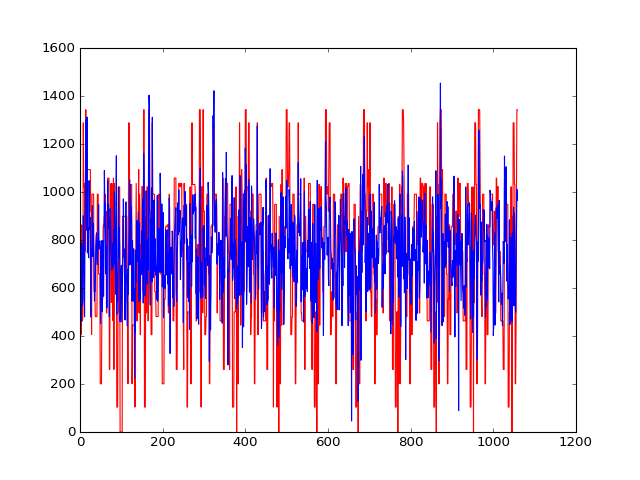

In [6]:
regr.fit(x,latitude)
print regr.score(x,latitude)
# Plot outputs
plt.plot(np.arange(num_row), latitude,  color='red')
plt.plot(np.arange(num_row), regr.predict(x), color='blue',linewidth=1)

plt.show()